In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Step 2: Load dataset

car_data = pd.read_csv('car data.csv')

# Display the first few rows of the dataset
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Step 3: Check for missing values
print(car_data.isnull().sum())

# Step 4: Encode categorical features
le = LabelEncoder()
car_data['Fuel_Type'] = le.fit_transform(car_data['Fuel_Type'])
car_data['Selling_type'] = le.fit_transform(car_data['Selling_type'])
car_data['Transmission'] = le.fit_transform(car_data['Transmission'])

# Drop unnecessary columns (if any)
car_data = car_data.drop(columns=['Car_Name'])  # Assuming 'Car_Name' is irrelevant for the prediction


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Step 5: Feature selection
X = car_data.drop(columns=['Selling_Price'])  # Features
y = car_data['Selling_Price']  # Target variable

# Check the shape of the data
print(X.shape, y.shape)


(301, 7) (301,)


In [ ]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (240, 7)
Test set: (61, 7)


In [ ]:
# Step 7: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
# Step 8: Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


Root Mean Squared Error (RMSE): 1.8792498207985324
R-squared (R2 Score): 0.8466902419662664


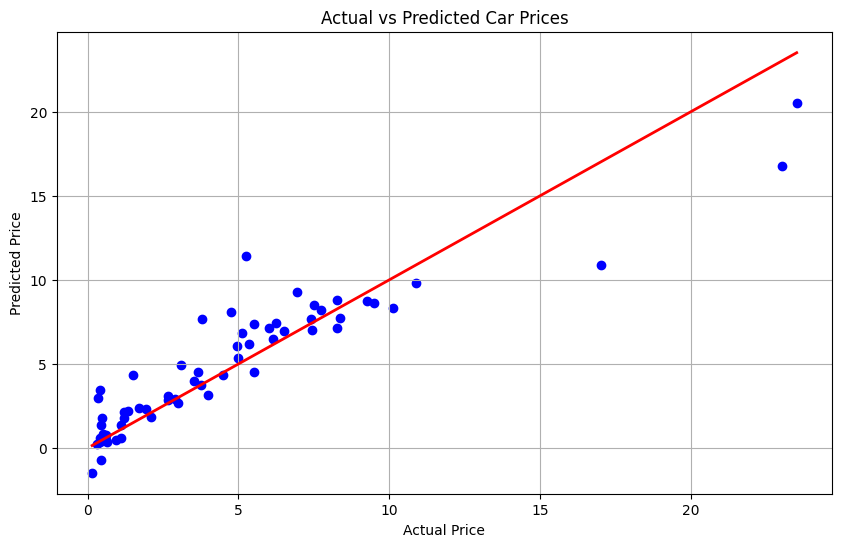

In [ ]:
# Step 9: Visualize actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()


In [ ]:
# Step 10: Save the trained model
import joblib
joblib.dump(model, 'car_price_prediction_model.pkl')


['car_price_prediction_model.pkl']